Q2:Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
2) Salary_hike -> Build a prediction model for Salary_hike

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as pyplot


import dataset

In [93]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data (3).csv


In [94]:
data=pd.read_csv("Salary_Data.csv")

In [74]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [75]:
data.shape

(30, 2)

In [76]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [77]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [78]:
data.nunique()

YearsExperience    28
Salary             30
dtype: int64

In [79]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<ipython-input-80-f0f3c37637f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

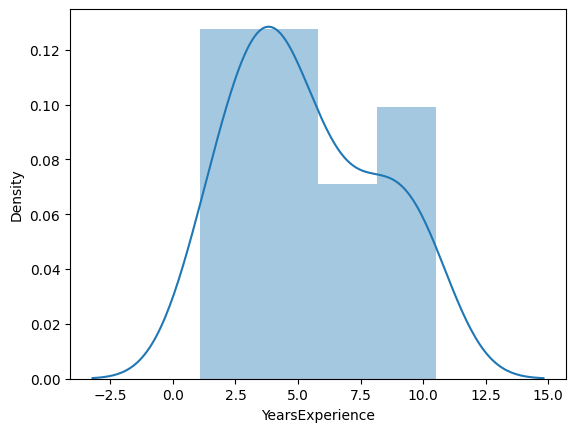

In [80]:
sns.distplot(data['YearsExperience'])

<ipython-input-49-10b07b01fa97>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

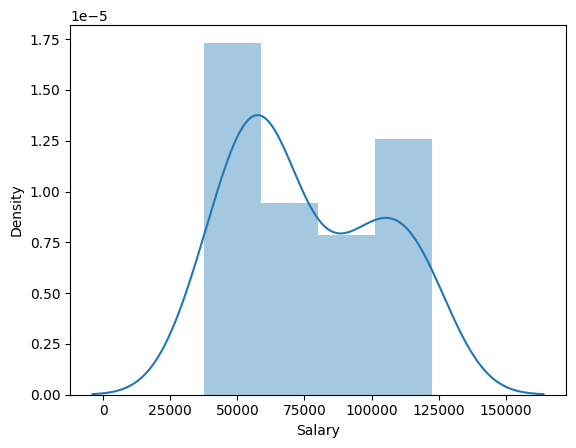

In [49]:
sns.distplot(data['Salary'])

In [95]:
##renaming the columns
data=data.rename({'YearsExperience':'Experience','Salary':'salary'},axis=1)

In [96]:
data

,Experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [52]:
#Correlation Analysis
data.corr()

,Experience,salary
Experience,1.000000,0.978242
salary,0.978242,1.000000


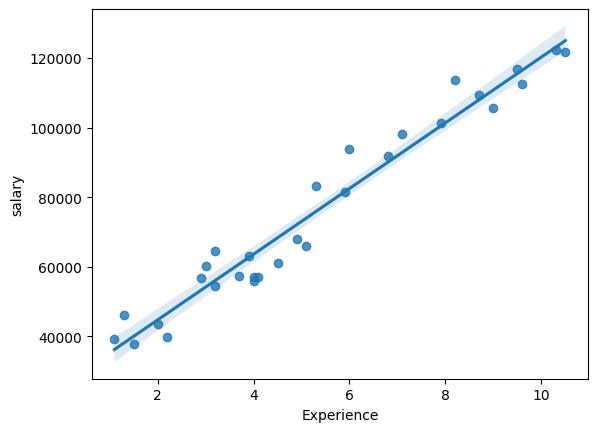

In [53]:
sns.regplot(x = "Experience", y = "salary" , data=data);

## Transformation(log)

In [54]:
data[['salary','Experience']]=np.log(data[['salary','Experience']])
data[['salary','Experience']]

,salary,Experience
0,10.580073,0.095310
1,10.740843,0.262364
2,10.538237,0.405465
3,10.681091,0.693147
4,10.593906,0.788457
5,10.944506,1.064711
6,11.004597,1.098612
7,10.904946,1.163151
8,11.073567,1.163151
9,10.954117,1.308333


# Fitting a Simple Linear Regression Model

In [56]:
import statsmodels.formula.api as smf
model = smf.ols("salary~Experience",data=data).fit()

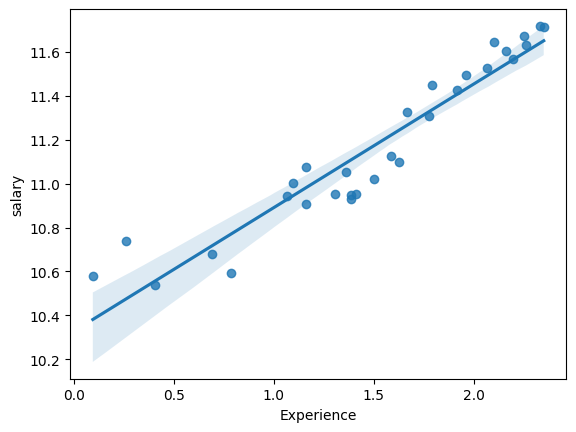

In [57]:
sns.regplot(x = "Experience", y = "salary" , data=data);

# model testing

In [58]:
# coefficient parameters
model.params

Intercept     10.328043
Experience     0.562089
dtype: float64

In [59]:
# Rsquared and adjusted_Rsquared values
model.rsquared,model.rsquared_adj

(0.905215072581715, 0.9018298966024905)

# model predictions

In [60]:
#Predict for 4 and 8 years experiance
newdata=pd.Series([4,8])

In [61]:
data_pred=pd.DataFrame(newdata,columns=["Experience"])

In [62]:
data_pred

,Experience
0,4
1,8


In [63]:
model.predict(data_pred)

0    12.576399
1    14.824754
dtype: float64

# Transformation(square root)

In [83]:
data[['salary','Experience']]=np.sqrt(data[['salary','Experience']])
data[['salary','Experience']]

,salary,Experience
0,198.350700,1.048809
1,214.953483,1.140175
2,194.244691,1.224745
3,208.626460,1.414214
4,199.727314,1.483240
5,237.995798,1.702939
6,245.254969,1.732051
7,233.334524,1.788854
8,253.860198,1.788854
9,239.142217,1.923538


# model building

In [85]:
import statsmodels.formula.api as smf
model = smf.ols("salary~Experience",data=data).fit()

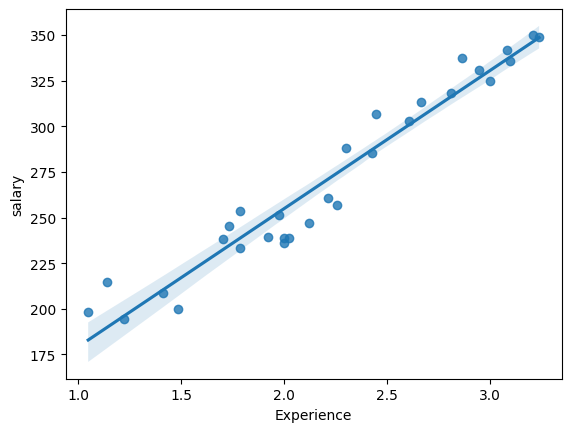

In [86]:
sns.regplot(x = "Experience", y = "salary" , data=data);

# model testing

In [87]:
# coefficient parameters
model.params

Intercept     103.568031
Experience     75.626932
dtype: float64

In [88]:
# Rsquared and adjusted_Rsquared values
model.rsquared,model.rsquared_adj

(0.9419490138976825, 0.9398757643940283)

In [89]:
#model predictions
#Predict for 4 and 8 years experiance
newdata=pd.Series([4,8])

In [90]:
data_pred=pd.DataFrame(newdata,columns=["Experience"])

In [91]:
data_pred

,Experience
0,4
1,8


In [92]:
model.predict(data_pred)

0    406.075758
1    708.583486
dtype: float64

# Transformation(cube root)

In [97]:
data[['salary','Experience']]=np.cbrt(data[['salary','Experience']])
data[['salary','Experience']]

,salary,Experience
0,34.011242,1.032280
1,35.883626,1.091393
2,33.540235,1.144714
3,35.175984,1.259921
4,34.168426,1.300591
5,38.404271,1.426043
6,39.181273,1.442250
7,37.901174,1.473613
8,40.092494,1.473613
9,38.527500,1.546680


# model building

In [98]:
import statsmodels.formula.api as smf
model = smf.ols("salary~Experience",data=data).fit()

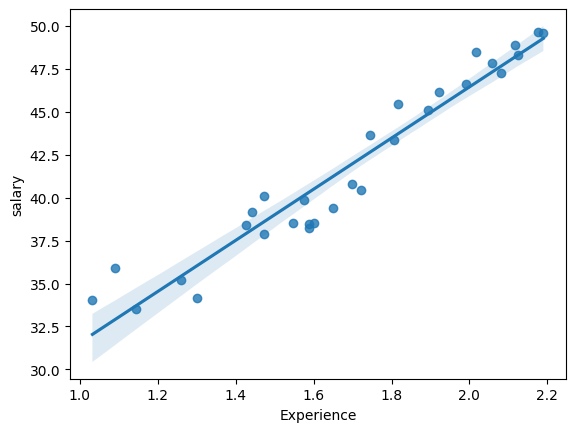

In [99]:
sns.regplot(x = "Experience", y = "salary" , data=data);

# model testing

In [100]:
# coefficient parameters
model.params

Intercept     16.660277
Experience    14.896252
dtype: float64

In [101]:
# Rsquared and adjusted_Rsquared values
model.rsquared,model.rsquared_adj

(0.9324434036761003, 0.9300306680931039)

In [102]:
#model predictions
#Predict for 4 and 8 years experiance
newdata=pd.Series([4,8])

In [103]:
data_pred=pd.DataFrame(newdata,columns=["Experience"])

In [104]:
data_pred

,Experience
0,4
1,8


In [105]:
model.predict(data_pred)

0     76.245284
1    135.830292
dtype: float64